# House Price Regrsssion Project - Suvarna Satav

In [3]:
from warnings import filterwarnings
filterwarnings('ignore')

1. Read dataset
2. Feature Selection
3. Final Pipeline
4. Model Building
5. Model Evaluation
6. Out of Prediction

#### Step 1: Read the train dataset

In [4]:
import pandas as pd
df = pd.read_csv('training_set.csv')
#Not required NA since na has meanoing like no base basement etc
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


####  Step2: Perform baic quality checks

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
m = df.isna().sum()
m[m>0]

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

#### Step3 : Separate X and Y(SalePrice)

In [7]:
X = df.drop(columns=['Id','SalePrice'])
Y = df[['SalePrice']]

In [8]:
X.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [9]:
Y.head()

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000


#### Step 4: Perform Feature Selection
##### Separate Cat and con features of X

In [10]:
cat = list(X.columns[X.dtypes=='object'])
con = list(X.columns[X.dtypes!='object'])
con

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [11]:
cat

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [12]:
con

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [14]:
num_pipe1 = Pipeline(steps=[('impute',SimpleImputer(strategy='median')),
                            ('Scaler',StandardScaler())])

In [15]:
cat_pipe1 = Pipeline(steps=[('impute',SimpleImputer(strategy='constant',fill_value='Not_Avail')),
                           ('ordinal',OrdinalEncoder())])
# working cat_pipe1 = Pipeline(steps=[('impute' , SimpleImputer(strategy='constant',fill_value='Not_Avail')),
                       #     ('ordinal', OrdinalEncoder())])

In [16]:
pre1 = ColumnTransformer([('num',num_pipe1,con),
                          ('cat',cat_pipe1,cat)]).set_output(transform='pandas')

In [17]:
X_pre = pre1.fit_transform(X)
X_pre.head()

,num__MSSubClass,num__LotFrontage,num__LotArea,num__OverallQual,num__OverallCond,num__YearBuilt,num__YearRemodAdd,num__MasVnrArea,num__BsmtFinSF1,num__BsmtFinSF2,...,cat__GarageType,cat__GarageFinish,cat__GarageQual,cat__GarageCond,cat__PavedDrive,cat__PoolQC,cat__Fence,cat__MiscFeature,cat__SaleType,cat__SaleCondition
0,0.073375,-0.220875,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.514104,0.575425,-0.288653,...,1.0,2.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,4.0
1,-0.872563,0.460320,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.570750,1.171992,-0.288653,...,1.0,2.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,4.0
2,0.073375,-0.084636,0.073480,0.651479,-0.517200,0.984752,0.830215,0.325915,0.092907,-0.288653,...,1.0,2.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,4.0
3,0.309859,-0.447940,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.570750,-0.499274,-0.288653,...,5.0,3.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,0.0
4,0.073375,0.641972,0.375148,1.374795,-0.517200,0.951632,0.733308,1.366489,0.463568,-0.288653,...,1.0,2.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,4.0


#### Feature Selection

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector
lr = LinearRegression()
sel = SequentialFeatureSelector(lr,n_features_to_select='auto',direction='backward')
sel.fit_transform(X_pre,Y)
sel_cols = sel.get_feature_names_out()
sel_cols

array(['num__MSSubClass', 'num__LotArea', 'num__OverallQual',
       'num__OverallCond', 'num__YearBuilt', 'num__MasVnrArea',
       'num__BsmtFinSF2', 'num__BsmtUnfSF', 'num__1stFlrSF',
       'num__2ndFlrSF', 'num__LowQualFinSF', 'num__GrLivArea',
       'num__BsmtFullBath', 'num__KitchenAbvGr', 'num__TotRmsAbvGrd',
       'num__Fireplaces', 'num__GarageCars', 'num__WoodDeckSF',
       'num__EnclosedPorch', 'num__ScreenPorch', 'num__PoolArea',
       'num__YrSold', 'cat__MSZoning', 'cat__Street', 'cat__LandContour',
       'cat__Neighborhood', 'cat__RoofMatl', 'cat__MasVnrType',
       'cat__ExterQual', 'cat__Foundation', 'cat__BsmtQual',
       'cat__BsmtCond', 'cat__BsmtExposure', 'cat__HeatingQC',
       'cat__KitchenQual', 'cat__Functional', 'cat__FireplaceQu',
       'cat__GarageFinish', 'cat__GarageQual', 'cat__SaleCondition'],
      dtype=object)

In [19]:
len(sel_cols)

40

In [20]:
sel_cols[0]

'num__MSSubClass'

In [21]:
sel_cols[0].split('__')

['num', 'MSSubClass']

In [22]:
sel_cols[0].split('__')[1]

'MSSubClass'

In [23]:
imp_cols = []
for i in sel_cols:
    s = i.split('__')[1]
    imp_cols.append(s)

In [24]:
imp_cols

['MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'MasVnrArea',
 'BsmtFinSF2',
 'BsmtUnfSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'WoodDeckSF',
 'EnclosedPorch',
 'ScreenPorch',
 'PoolArea',
 'YrSold',
 'MSZoning',
 'Street',
 'LandContour',
 'Neighborhood',
 'RoofMatl',
 'MasVnrType',
 'ExterQual',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'HeatingQC',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageFinish',
 'GarageQual',
 'SaleCondition']

In [25]:
X_sel = X[imp_cols]

In [26]:
X_sel

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,BsmtFinSF2,BsmtUnfSF,1stFlrSF,2ndFlrSF,...,BsmtQual,BsmtCond,BsmtExposure,HeatingQC,KitchenQual,Functional,FireplaceQu,GarageFinish,GarageQual,SaleCondition
0,60,8450,7,5,2003,196.0,0,150,856,854,...,Gd,TA,No,Ex,Gd,Typ,NaN,RFn,TA,Normal
1,20,9600,6,8,1976,0.0,0,284,1262,0,...,Gd,TA,Gd,Ex,TA,Typ,TA,RFn,TA,Normal
2,60,11250,7,5,2001,162.0,0,434,920,866,...,Gd,TA,Mn,Ex,Gd,Typ,TA,RFn,TA,Normal
3,70,9550,7,5,1915,0.0,0,540,961,756,...,TA,Gd,No,Gd,Gd,Typ,Gd,Unf,TA,Abnorml
4,60,14260,8,5,2000,350.0,0,490,1145,1053,...,Gd,TA,Av,Ex,Gd,Typ,TA,RFn,TA,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,7917,6,5,1999,0.0,0,953,953,694,...,Gd,TA,No,Ex,TA,Typ,TA,RFn,TA,Normal
1456,20,13175,6,6,1978,119.0,163,589,2073,0,...,Gd,TA,No,TA,TA,Min1,TA,Unf,TA,Normal
1457,70,9042,7,9,1941,0.0,0,877,1188,1152,...,TA,Gd,No,Ex,Gd,Typ,Gd,RFn,TA,Normal
1458,20,9717,5,6,1950,0.0,1029,0,1078,0,...,TA,TA,Mn,Gd,Gd,Typ,NaN,Unf,TA,Normal


#### Step 5: Create a final pipeline
##### cat : OneHotEncoder

In [27]:
cat_sel = list(X_sel.columns[X_sel.dtypes=='object'])
con_sel = list(X_sel.columns[X_sel.dtypes!='object'])

In [28]:
cat_sel

['MSZoning',
 'Street',
 'LandContour',
 'Neighborhood',
 'RoofMatl',
 'MasVnrType',
 'ExterQual',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'HeatingQC',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageFinish',
 'GarageQual',
 'SaleCondition']

In [29]:
con_sel

['MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'MasVnrArea',
 'BsmtFinSF2',
 'BsmtUnfSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'WoodDeckSF',
 'EnclosedPorch',
 'ScreenPorch',
 'PoolArea',
 'YrSold']

In [30]:
from sklearn.preprocessing import OneHotEncoder

In [31]:
num_pipe2 = Pipeline(steps=[('impute',SimpleImputer(strategy='median')),
                            ('scaler',StandardScaler())])

In [32]:
cat_pipe2 = Pipeline(steps=[('impute',SimpleImputer(strategy='constant',fill_value='Na_Avail')),
                            ('ohe',OneHotEncoder(handle_unknown='ignore',sparse_output=False))])

In [33]:
pre2 = ColumnTransformer([('num',num_pipe2,con_sel),
                          ('cat',cat_pipe2,cat_sel)]).set_output(transform='pandas')

In [34]:
X_sel_pre = pre2.fit_transform(X_sel)
X_sel_pre.head()

,num__MSSubClass,num__LotArea,num__OverallQual,num__OverallCond,num__YearBuilt,num__MasVnrArea,num__BsmtFinSF2,num__BsmtUnfSF,num__1stFlrSF,num__2ndFlrSF,...,cat__GarageQual_Gd,cat__GarageQual_Na_Avail,cat__GarageQual_Po,cat__GarageQual_TA,cat__SaleCondition_Abnorml,cat__SaleCondition_AdjLand,cat__SaleCondition_Alloca,cat__SaleCondition_Family,cat__SaleCondition_Normal,cat__SaleCondition_Partial
0,0.073375,-0.207142,0.651479,-0.517200,1.050994,0.514104,-0.288653,-0.944591,-0.793434,1.161852,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.872563,-0.091886,-0.071836,2.179628,0.156734,-0.570750,-0.288653,-0.641228,0.257140,-0.795163,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.073375,0.073480,0.651479,-0.517200,0.984752,0.325915,-0.288653,-0.301643,-0.627826,1.189351,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.309859,-0.096897,0.651479,-0.517200,-1.863632,-0.570750,-0.288653,-0.061670,-0.521734,0.937276,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.073375,0.375148,1.374795,-0.517200,0.951632,1.366489,-0.288653,-0.174865,-0.045611,1.617877,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


#### Step 6: Apply Train Test Split

In [35]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X_sel_pre,Y,test_size=0.2,random_state=21)


In [36]:
xtrain.shape

(1168, 133)

In [37]:
xtest.shape

(292, 133)

In [38]:
ytrain.shape

(1168, 1)

In [39]:
ytest.shape

(292, 1)

In [40]:
xtrain.head()

,num__MSSubClass,num__LotArea,num__OverallQual,num__OverallCond,num__YearBuilt,num__MasVnrArea,num__BsmtFinSF2,num__BsmtUnfSF,num__1stFlrSF,num__2ndFlrSF,...,cat__GarageQual_Gd,cat__GarageQual_Na_Avail,cat__GarageQual_Po,cat__GarageQual_TA,cat__SaleCondition_Abnorml,cat__SaleCondition_AdjLand,cat__SaleCondition_Alloca,cat__SaleCondition_Family,cat__SaleCondition_Normal,cat__SaleCondition_Partial
710,-0.636078,-0.640101,-2.241782,0.381743,-1.201217,-0.570750,-0.288653,-0.672923,-1.122062,-0.795163,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1098,-0.163109,-0.452686,-1.518467,0.381743,-1.168096,-0.570750,-0.288653,-1.284176,-1.049608,0.504166,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1286,-0.872563,-0.072844,-0.071836,-0.517200,-0.273836,1.925521,0.213629,0.250749,0.427923,-0.795163,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
992,0.073375,-0.075851,-0.071836,2.179628,-0.240715,1.311140,0.436865,-0.901577,-0.369064,1.109145,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
631,1.492282,-0.593999,1.374795,-0.517200,1.150356,0.027027,-0.288653,2.179592,1.012726,-0.795163,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [41]:
xtest.head()

,num__MSSubClass,num__LotArea,num__OverallQual,num__OverallCond,num__YearBuilt,num__MasVnrArea,num__BsmtFinSF2,num__BsmtUnfSF,num__1stFlrSF,num__2ndFlrSF,...,cat__GarageQual_Gd,cat__GarageQual_Na_Avail,cat__GarageQual_Po,cat__GarageQual_TA,cat__SaleCondition_Abnorml,cat__SaleCondition_AdjLand,cat__SaleCondition_Alloca,cat__SaleCondition_Family,cat__SaleCondition_Normal,cat__SaleCondition_Partial
880,-0.872563,-0.350058,-0.795151,-0.517200,1.117235,-0.570750,-0.288653,-1.035147,-0.187930,-0.795163,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
605,0.073375,0.309002,0.651479,0.381743,-0.207594,0.403405,-0.288653,-0.573311,0.060481,1.038106,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1166,-0.872563,-0.004192,1.374795,-0.517200,1.216598,-0.172232,-0.288653,2.550871,1.374993,-0.795163,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
216,-0.872563,-0.207142,0.651479,-0.517200,1.084115,0.901552,-0.288653,-0.174865,0.707387,-0.795163,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
970,-0.163109,0.028380,-1.518467,-1.416142,-0.737526,-0.570750,-0.288653,0.345832,-1.145350,0.286466,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [42]:
ytest.head()

,SalePrice
880,157000
605,205000
1166,245350
216,210000
970,135000


In [43]:
ytrain.head()

,SalePrice
710,52000
1098,128000
1286,143000
992,187000
631,209500


#### Step 7 : Model Building

In [44]:
model1 = LinearRegression()
model1.fit(xtrain,ytrain)

LinearRegression()

In [45]:
# Check r2 score in xtrain

In [46]:
model1.score(xtrain,ytrain)

0.9213421244428596

In [47]:
model1.score(xtest,ytest)

0.8206292821307603

#### Create Ridge Model

In [48]:
import numpy as np
params = {'alpha':np.arange(1,1000,1)}
params

{'alpha': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
         27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
         40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
         53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
         66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
         79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
         92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
        105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
        118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
        131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
        144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
        157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
        170, 171, 172, 173, 174, 175, 176,

In [50]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
rr  = Ridge()
gscv_ridge = GridSearchCV(rr,param_grid=params,cv = 5,scoring='neg_mean_squared_error')
gscv_ridge.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99...
       911, 912, 913, 914, 915, 916, 917, 918, 919, 920, 921, 922, 923,
       924, 925, 926, 927, 928, 929, 930, 931, 932, 933, 934, 935, 936,
       937, 938, 939, 940, 941, 942, 943, 944, 945, 946, 947, 948, 949,
       950, 951, 952, 953, 954, 955, 956, 957, 958, 959, 960, 961, 962,
       963, 964, 965, 966, 967, 968, 969, 970, 971, 972, 973, 974, 975,
       976, 977, 978, 979, 980, 981, 982, 983, 984, 985, 986, 987, 988,
       989, 990, 991, 992, 993, 994, 995, 996, 997, 998, 999])},
             scoring='neg_mean_squared_error')

In [51]:
gscv_ridge.best_params_

{'alpha': 15}

In [52]:
gscv_ridge.best_score_

-960321411.2397999

In [54]:
best_ridge = gscv_ridge.best_estimator_
best_ridge

Ridge(alpha=15)

In [55]:
best_ridge.score(xtrain,ytrain)

0.8855579038229714

In [56]:
best_ridge.score(xtest,ytest)

0.8373943427491882

#### Create Lasso Model

In [57]:
from sklearn.linear_model import Lasso
ls = Lasso()
gscv_lasso = GridSearchCV(ls,param_grid=params,cv=5,scoring='neg_mean_squared_error')
gscv_lasso.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99...
       911, 912, 913, 914, 915, 916, 917, 918, 919, 920, 921, 922, 923,
       924, 925, 926, 927, 928, 929, 930, 931, 932, 933, 934, 935, 936,
       937, 938, 939, 940, 941, 942, 943, 944, 945, 946, 947, 948, 949,
       950, 951, 952, 953, 954, 955, 956, 957, 958, 959, 960, 961, 962,
       963, 964, 965, 966, 967, 968, 969, 970, 971, 972, 973, 974, 975,
       976, 977, 978, 979, 980, 981, 982, 983, 984, 985, 986, 987, 988,
       989, 990, 991, 992, 993, 994, 995, 996, 997, 998, 999])},
             scoring='neg_mean_squared_error')

In [58]:
gscv_lasso.best_params_

{'alpha': 113}

In [59]:
gscv_lasso.best_score_

-929545432.053549

In [60]:
best_lasso = gscv_lasso.best_estimator_
best_lasso

Lasso(alpha=113)

In [61]:
best_lasso.score(xtrain,ytrain)

0.911685794706468

In [62]:
best_lasso.score(xtest,ytest)

0.8287595823847242

#### Step 8 Model Evaluation

In [63]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [64]:
def evaluate_model(model,x,y):
    ypred = model.predict(x)
    mse = mean_squared_error(y,ypred)
    rmse = mse **(1/2)
    mae = mean_absolute_error(y,ypred)
    r2 = r2_score(y,ypred)
    print(f'Mean Squard Error : {mse : .2f}')
    print(f'Root Mean Square Error {rmse : .2f}')
    print(f'Mean Absolute Error : {mae: .2f}')
    print(f'R2 Score {r2: .4f}')

In [65]:
# Evaluate for Ridge

In [66]:
print('Ridge Model Evaluation : \n')
print('Train Results')
evaluate_model(best_ridge,xtrain,ytrain)
print('\n-----------------------------------------------\n')
print('Test Result')
evaluate_model(best_ridge,xtest,ytest)

Ridge Model Evaluation : 

Train Results
Mean Squard Error :  708273609.75
Root Mean Square Error  26613.41
Mean Absolute Error :  15987.78
R2 Score  0.8856

-----------------------------------------------

Test Result
Mean Squard Error :  1102029269.40
Root Mean Square Error  33196.83
Mean Absolute Error :  17317.07
R2 Score  0.8374


In [67]:
# Evaluate Lasso Model
print('Lasso Model Results\n')
print('Train results')
evaluate_model(best_lasso,xtrain,ytrain)
print('\n-------------------------------------------\n')
print('Test Result')
evaluate_model(best_lasso,xtest,ytest)


Lasso Model Results

Train results
Mean Squard Error :  546570039.04
Root Mean Square Error  23378.84
Mean Absolute Error :  15560.18
R2 Score  0.9117

-------------------------------------------

Test Result
Mean Squard Error :  1160549734.29
Root Mean Square Error  34066.84
Mean Absolute Error :  17091.87
R2 Score  0.8288


#### Cross Validate r2 for ridge and lasso

In [68]:
from sklearn.model_selection import cross_val_score
score_ridge = cross_val_score(best_ridge,xtrain,ytrain,cv=5,scoring='r2')
score_ridge

array([0.67545785, 0.8532272 , 0.90149633, 0.88064285, 0.92376826])

In [69]:
score_ridge.mean()

0.846918500160092

In [71]:
score_lasso = cross_val_score(best_lasso,xtrain,ytrain,cv=5,scoring='r2')
score_lasso

array([0.67609665, 0.86930809, 0.90591436, 0.88162335, 0.92777073])

In [72]:
score_lasso.mean()

0.8521426364604772

#### Select lasso model because higher results in r2 of 0.85  
#### Step 9:  Out of Sample

In [74]:
xnew = pd.read_csv('sample_set.csv')
xnew.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [76]:
pre2

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['MSSubClass', 'LotArea', 'OverallQual',
                                  'OverallCond', 'YearBuilt', 'MasVnrArea',
                                  'BsmtFinSF2', 'BsmtUnfSF', '1stFlrSF',
                                  '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
                                  'BsmtFullBath', 'KitchenAbvGr',
                                  'TotRmsAbvGrd', 'Fireplaces', 'GarageCars'...
                                                  SimpleImputer(fill_value='Na_Avail',
                                                                strategy='constant')),
                                                 ('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['MSZoning', 'Street', 'LandContour',
                                  'Neighborhood', 'RoofMatl', 'MasVnrType',
                                  'ExterQual', 'Foundation', 'BsmtQual',
                                  'BsmtCond', 'BsmtExposure', 'HeatingQC',
                                  'KitchenQual', 'Functional', 'FireplaceQu',
                                  'GarageFinish', 'GarageQual',
                                  'SaleCondition'])])

#### Apply Pre2.transform

In [77]:
xnew_pre = pre2.transform(xnew)
xnew_pre.head()

,num__MSSubClass,num__LotArea,num__OverallQual,num__OverallCond,num__YearBuilt,num__MasVnrArea,num__BsmtFinSF2,num__BsmtUnfSF,num__1stFlrSF,num__2ndFlrSF,...,cat__GarageQual_Gd,cat__GarageQual_Na_Avail,cat__GarageQual_Po,cat__GarageQual_TA,cat__SaleCondition_Abnorml,cat__SaleCondition_AdjLand,cat__SaleCondition_Alloca,cat__SaleCondition_Family,cat__SaleCondition_Normal,cat__SaleCondition_Partial
0,-0.872563,0.110763,-0.795151,0.381743,-0.340077,-0.570750,0.604293,-0.672923,-0.689929,-0.795163,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.872563,0.375850,-0.071836,0.381743,-0.439440,0.027027,-0.288653,-0.365032,0.430511,-0.795163,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.073375,0.332053,-0.795151,-0.517200,0.852269,-0.570750,-0.288653,-0.974021,-0.607125,0.811239,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.073375,-0.054002,-0.071836,0.381743,0.885390,-0.460051,-0.288653,-0.550672,-0.612300,0.758532,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.492282,-0.552407,1.374795,-0.517200,0.686666,-0.570750,-0.288653,1.018211,0.303718,-0.795163,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [78]:
preds = best_lasso.predict(xnew_pre)

In [79]:
preds

array([115077.23781836, 149781.79215429, 175214.68152497, ...,
       163581.21450917, 114774.88300871, 219096.39155281])

#### Save above into dataframe 

In [80]:
df_results = xnew[['Id']]
df_results

,Id
0,1461
1,1462
2,1463
3,1464
4,1465
...,...
1454,2915
1455,2916
1456,2917
1457,2918


In [82]:
df_results['SalePrice_Pred'] = preds
df_results

,Id,SalePrice_Pred
0,1461,115077.237818
1,1462,149781.792154
2,1463,175214.681525
3,1464,182532.787464
4,1465,200279.341285
...,...,...
1454,2915,87598.548404
1455,2916,73204.776687
1456,2917,163581.214509
1457,2918,114774.883009


<Axes: xlabel='SalePrice_Pred', ylabel='Count'>

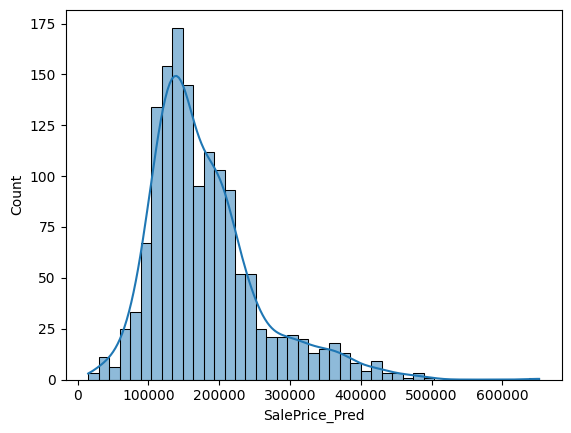

In [85]:
import seaborn as sns 
sns.histplot(data=df_results,x='SalePrice_Pred',kde=True)

In [86]:
df_results.to_csv('Results.csv',index=False)